# 2022年7月12日09:59:00

## 1. 高斯-勒让德积分

In [7]:
import numpy as np
from numpy.polynomial.legendre import leggauss

In [8]:
# 需要继续积分域分别为x:[0-2];y:[0-2]
# 因为这关系到dx转换到de之后的系数
def f(x,y):
    return 3*y**2+2*x

假如要求的积分如下：  
  
$$I=\int_{x_a}^{x_b}\int_{y_a}^{y_b}f(x,y)dxdy$$

利用变换可得到：  
  
$x=\frac{(x_b-x_a)\xi+(x_b+x_a)}{2}$，其中$\xi \in [-1,1]$  
  
    
$y=\frac{(y_b-y_a)\eta+(y_b+y_a)}{2}$，其中$\eta \in [-1,1]$ 
  
    
$dx=\frac{x_b-x_a}{2}d \xi$  
  
    
$dy=\frac{y_b-y_a}{2}d \eta$ 

将上述变换公式带入原式可得：
$$I=\int_{-1}^1 \int_{-1}^1 f(\frac{(x_b-x_a)\xi+(x_b+x_a)}{2},\frac{(y_b-y_a)\eta+(y_b+y_a)}{2})\frac{x_b-x_a}{2}d \xi \frac{y_b-y_a}{2}d \eta$$

将常数移出来，可得：
$$I=\frac{x_b-x_a}{2}\frac{y_b-y_a}{2}\int_{-1}^1 \int_{-1}^1 f(\frac{(x_b-x_a)\xi+(x_b+x_a)}{2},\frac{(y_b-y_a)\eta+(y_b+y_a)}{2})d \xi d \eta$$

对于从-1到1之间的积分，可以使用高斯-勒让德积分公式求得，首先令：
$F(\xi,\eta)=f(\frac{(x_b-x_a)\xi+(x_b+x_a)}{2},\frac{(y_b-y_a)\eta+(y_b+y_a)}{2})$,则：

$$\int_{-1}^1\int_{-1}^1 F(\xi,\eta)d\xi d\eta=\sum_{i=1}^n\sum_{j=1}^n w_i w_j F(\xi_i,\eta_j)$$
  
其中，$w_i$，$w_j$，$\xi_i$，$\eta_j$表示高斯-勒让德积分中的权重和采样坐标，可以通过查表获得

所以：
  
$$I=\frac{x_b-x_a}{2}\frac{y_b-y_a}{2}\sum_{i=1}^n\sum_{j=1}^n w_i w_j F(\xi_i,\eta_j)$$

In [12]:
def leg_gau_2d(f,n,xa,xb,ya,yb):
    x,w=leggauss(n)
    # x=(xb-xa)xi/2+(xb+xa)/2
    # y=(yb-ya)eta/2+(yb+ya)/2
    # dx=(xb-xa)/2 dxi
    # dy=(yb-ya)/2 deta
    summ=0
    for i in range(len(x)):
        # i 代表x,用a表示
        a=(xb-xa)*x[i]/2+(xb+xa)/2
        for j in range(len(x)):
            # j 代表y，用b表示
            b=(yb-ya)*x[j]/2+(yb+ya)/2
            summ+=w[i]*w[j]*f(a,b)
    
    return (xb-xa)/2*(yb-ya)/2*summ

In [26]:
leg_gau_2d(f,2,0,2,0,2)

24.0

## 2. 使用sympy试一下

In [14]:
import sympy as sp

In [17]:
xs,ys=sp.symbols('xs ys')
xs,ys

(xs, ys)

In [18]:
fs=3*ys**2+2*xs
fs

2*xs + 3*ys**2

In [22]:
def int_sp(fs,xa,xb,ya,yb):
    return sp.integrate(fs,(xs,xa,xb),(ys,ya,yb))
    

In [40]:
int_sp(fs,0,2,0,2)

24

# 3. 两种方式做个比较

In [39]:
xa,xb=-2.8,5.9
ya,yb=-2.8,6.4
leg_gau_2d(f,2,xa,xb,ya,yb),int_sp(fs,xa,xb,ya,yb)

(2719.7592, 2719.75920000000)

In [41]:
import matplotlib.pyplot as plt
plt.style.use(['science','grid','notebook'])

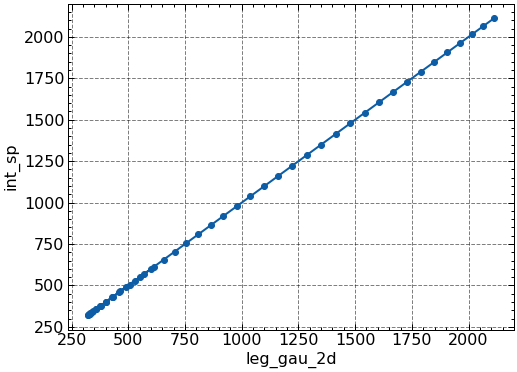

In [52]:
# 其中的数值是任意取得
# 但是要保证xa<xb;ya<yb
xa=np.linspace(-3,3)
xb=np.linspace(2,5)
ya=np.linspace(-5,2)
yb=np.linspace(1,10)
res=[(leg_gau_2d(f,2,xa[i],xb[i],ya[i],yb[i]),int_sp(fs,xa[i],xb[i],ya[i],yb[i]))for i in range(len(xa))]
res=np.array(res)    
plt.plot(res[:,0],res[:,1],'-o')
plt.xlabel('leg_gau_2d')
plt.ylabel('int_sp')
plt.show()

可以看到，通过两种方式计算的结果基本上是一样的